<a href="https://colab.research.google.com/github/pi-recious/DSLearning/blob/master/DataSampliingexipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataethics4all 
***Preprocessing*** 

**Sampling**

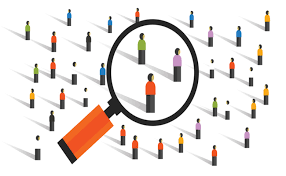 

# Excerise
This notebook will step through the major sampling techniques as well as show the consequences of badly sampled data 

## Random Sample
In this case we take a random sample of the underlying data

In [ ]:
import random
LENGTH = 5
data = [1,2,4,6,7,10,11,4,3,2,1,5,6,9,0,12]
random.sample(data,LENGTH)

### Write your own code

Take the list and sample it to LENGTH n

In [ ]:
data = [1,2,4,6,7,10,11,4,3,2,1,5,6,9,0,12]
LENGTH = 8 #this i
random.sample
#Put your own code here - don't use the random sample from the previous cell

## Stratified Sample

[More Information](https://en.wikipedia.org/wiki/Stratified_sampling). Stratfied samples sub-populations of a data set

Example taken from [Here](https://github.com/codebrain001/California-Housing-Project/blob/master/California%20Housing%20Project.ipynb)

This cell is for loading and basic characteristics

In [ ]:
#Download data
! wget --no-check-certificat 'https://docs.google.com/uc?export=download&id=1lPbYlrnt-n1ugpJUq7ny7NFaxveZt3sE' -O 'housing.csv'

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

data = pd.read_csv('housing.csv') #reading the California Housing data
data.head()
data.info()
data['ocean_proximity'].value_counts()
data.describe()
data.hist(bins=50, figsize=(20,20))
plt.show()
cor = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True)

Stratified Sample

In [ ]:
from sklearn.model_selection import train_test_split

#splitting the training data
train_set1, test_set1 = train_test_split(data, test_size=0.3, random_state=42)
train_set1.shape, test_set1.shape

data['income_cat'] =pd.cut(data['median_income'], bins = [0., 2., 4., 6., 8.,np.inf], labels=[1,2,3,4,5])
data['income_cat'].hist()

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.3, random_state=42)
sss.get_n_splits(data)

sss = StratifiedShuffleSplit(n_splits= 5, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(data,data['income_cat']):
    print('Train:', train_index, 'Test:', test_index)
    train_set2 = data.loc[train_index]
    test_set2 = data.loc[test_index]

test_set2['income_cat'].value_counts()/ len(test_set2)
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set1, test_set1 = train_test_split(data, test_size=0.2, random_state=42)
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data),
    "Random": income_cat_proportions(test_set1),
    "Stratified": income_cat_proportions(test_set2),  
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

# Write your own code

Write a balanced sample from housing.csv where all categories have the same amount of data


In [ ]:
#Write your code here